In [1]:
import os
print(os.getcwd())

C:\Users\ARVINDJAWAHAR\ML Projects


In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

!pip install xgboost
import xgboost as xg
from xgboost import XGBClassifier, plot_importance

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [2]:
#Data Loading
df = pd.read_csv("E:/ML Project/Credit Card Fraud Prediction/archive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
# Checking datatypes and null/non-null values distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking the distribution of Numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking the Class distribution of the target variable
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


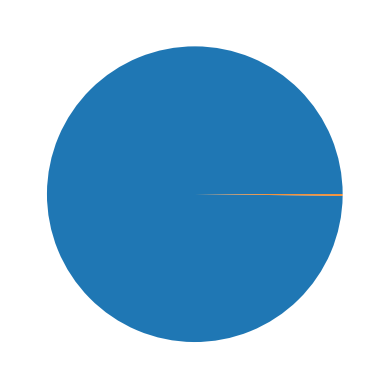

In [7]:
# Checking the Class distribution of the target variable in %
percentage = (df.groupby("Class")["Class"].count()/df["Class"].count()*100)
print(percentage)
plt.pie(percentage)
plt.show()

In [8]:
#Correlation
correlation = df.corr()
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


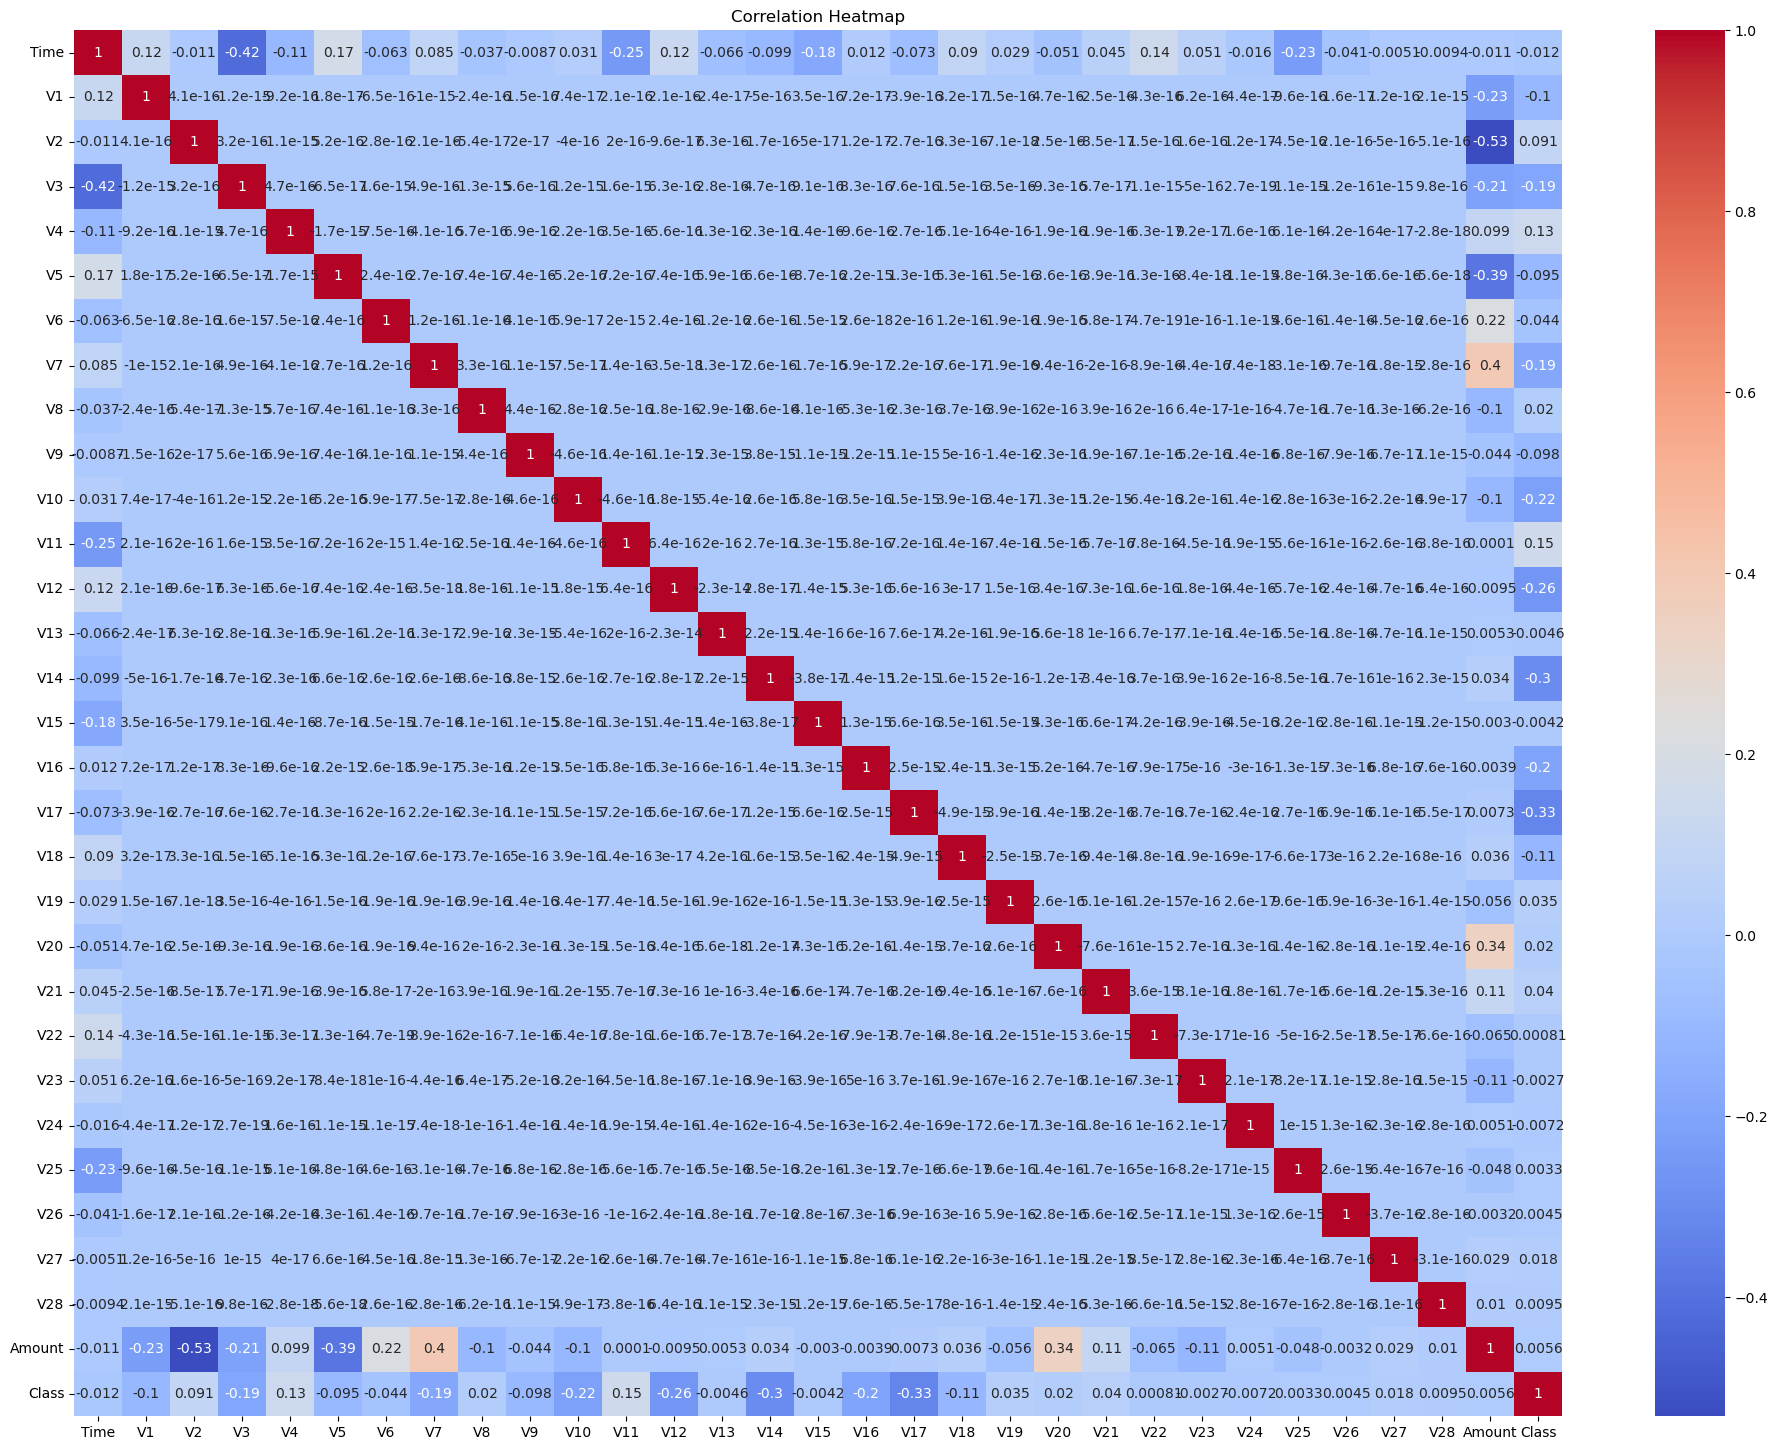

In [9]:
# Create a heatmap using Seaborn
plt.figure(figsize=(24, 18))
sns.heatmap(correlation, cmap='coolwarm', annot=True)

plt.title('Correlation Heatmap')
plt.show()

In [10]:
duplicated_values = df[df.duplicated()]
duplicated_values

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [11]:
#Drop duplicated_values
df = df.drop_duplicates()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Splitting the Data into train and test data**

In [12]:
# Splitting the dataset into X and Y
Y = df['Class']
X = df.drop(['Class'], axis = 1)

In [13]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [15]:
# train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.20 )

In [16]:
#Finding the Most Useful Variables for Predicting 'Class (feature importances) using RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [17]:
# Get feature importances
feature_importances = pd.DataFrame({'Features': X.columns, 'Importance': rf_classifier.feature_importances_})

feature_importances

,Features,Importance
0,Time,0.010265
1,V1,0.012809
2,V2,0.012069
3,V3,0.016525
4,V4,0.028241
5,V5,0.013126
6,V6,0.011776
7,V7,0.026744
8,V8,0.011182
9,V9,0.034854


In [18]:
# Sort feature importances in descending order
sorted_feature_importances = pd.DataFrame(feature_importances.sort_values(by ='Importance' ,ascending = False))
sorted_feature_importances

,Features,Importance
17,V17,0.149539
12,V12,0.137951
14,V14,0.124250
10,V10,0.086486
11,V11,0.068573
16,V16,0.064778
18,V18,0.035766
9,V9,0.034854
4,V4,0.028241
7,V7,0.026744


<Figure size 1000x600 with 0 Axes>

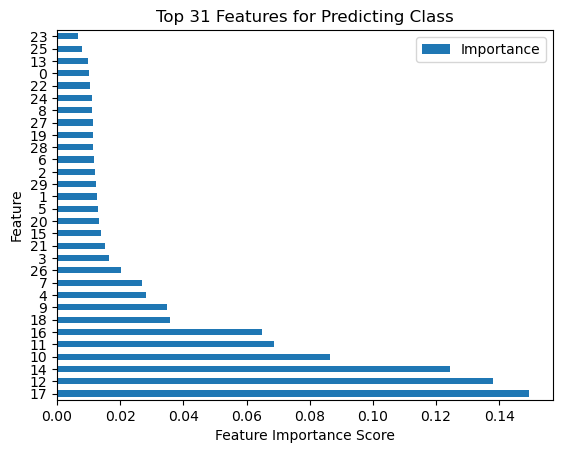

In [19]:
# Plot the top N features
top_n = 31  # You can adjust this number based on your preference
plt.figure(figsize=(10, 6))
sorted_feature_importances[:top_n].plot(kind='barh')
plt.title('Top {} Features for Predicting Class'.format(top_n))
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

In [20]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [21]:
# Splitting the dataset into X and Y
Y = df['Class']
X = df.drop(['Class'], axis = 1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [22]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [23]:
# train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.20 )

In [24]:
# Post split
print(np.sum(Y))
print(np.sum(Y_train))
print(np.sum(Y_test))

473
386
87


## **PCA**

In [25]:
# Implementing PCA to reduce the number of independent variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
from sklearn.decomposition import PCA

n_components = 0.95  # Adjust as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(283726, 27)

In [27]:
X_pca

array([[ 0.40486192, -2.53729907,  0.18445288, ..., -0.49451337,
         0.4569468 ,  0.42065234],
       [-0.40683829, -2.068709  , -0.20075609, ..., -0.07950852,
         0.25368818, -0.29094547],
       [ 1.86086261, -2.54406587,  0.00827487, ..., -0.46497167,
         0.68748708,  0.17739788],
       ...,
       [-0.19172992,  2.08563779, -0.67082938, ..., -0.61161376,
         0.49508089, -0.17475711],
       [-0.46288946,  1.21853071, -0.35750499, ..., -0.16871044,
        -0.62973578, -0.35986203],
       [ 0.78661351,  1.89664155, -0.51976701, ..., -0.42155558,
         0.36978652,  0.11267436]])

Explained Variance Ratio: [0.0655915  0.05634035 0.0341207  0.03401796 0.03390283 0.03385678
 0.03372041 0.03366688 0.03363185 0.03361129 0.0336046  0.03356929
 0.03352902 0.03348723 0.03343523 0.03342327 0.03341597 0.03338659
 0.0333493  0.03333439 0.0333295  0.0332713  0.03321997 0.03320883
 0.03268492 0.03246466 0.03196936]


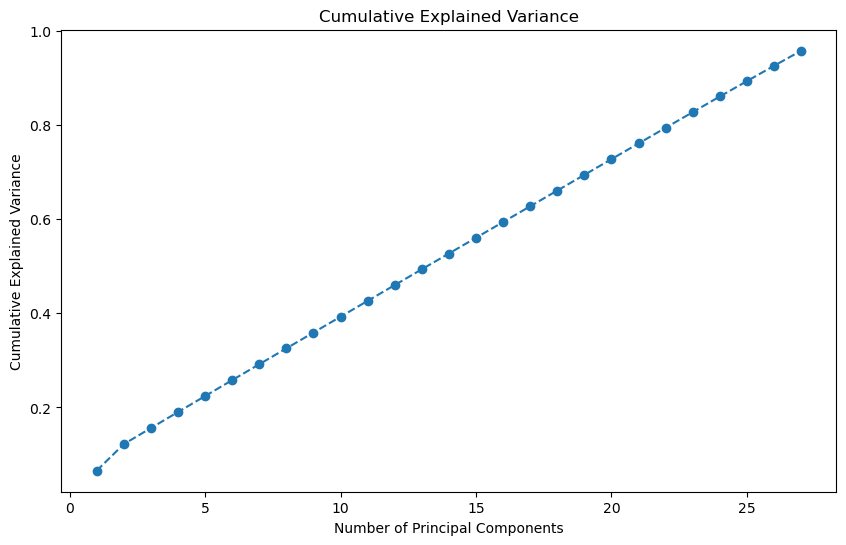

In [28]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [29]:
# Sorting the features by importance
sorted_feature_importances

,Features,Importance
17,V17,0.149539
12,V12,0.137951
14,V14,0.124250
10,V10,0.086486
11,V11,0.068573
16,V16,0.064778
18,V18,0.035766
9,V9,0.034854
4,V4,0.028241
7,V7,0.026744


In [30]:
# Dropping the least important features (i.e) V13, V25, V23 the last 3 features:
df.drop(['V13','V25','V23'], axis =1, inplace = True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V24,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,0.066928,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,-0.339846,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,-0.689281,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-1.175575,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,0.141267,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.682920,1.475829,0.213454,0.111864,-0.509348,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.545556,0.059616,0.214205,0.924384,-1.016226,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.577252,0.001396,0.232045,0.578229,0.640134,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,2.897849,0.127434,0.265245,0.800049,0.123205,0.546668,0.108821,0.104533,10.00,0


In [31]:
X_dr = df.drop(['Class'], axis=1)
X_dr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V18,V19,V20,V21,V22,V24,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.025791,0.403993,0.251412,-0.018307,0.277838,0.066928,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,-0.339846,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.121359,-2.261857,0.524980,0.247998,0.771679,-0.689281,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-1.175575,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.038195,0.803487,0.408542,-0.009431,0.798278,0.141267,0.502292,0.219422,0.215153,69.99


**Plotting the variables distribution**

In [32]:
# Accumulating all feature/column names in one variable
colms = list(X_dr.columns.values)
colms

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V24',
 'V26',
 'V27',
 'V28',
 'Amount']

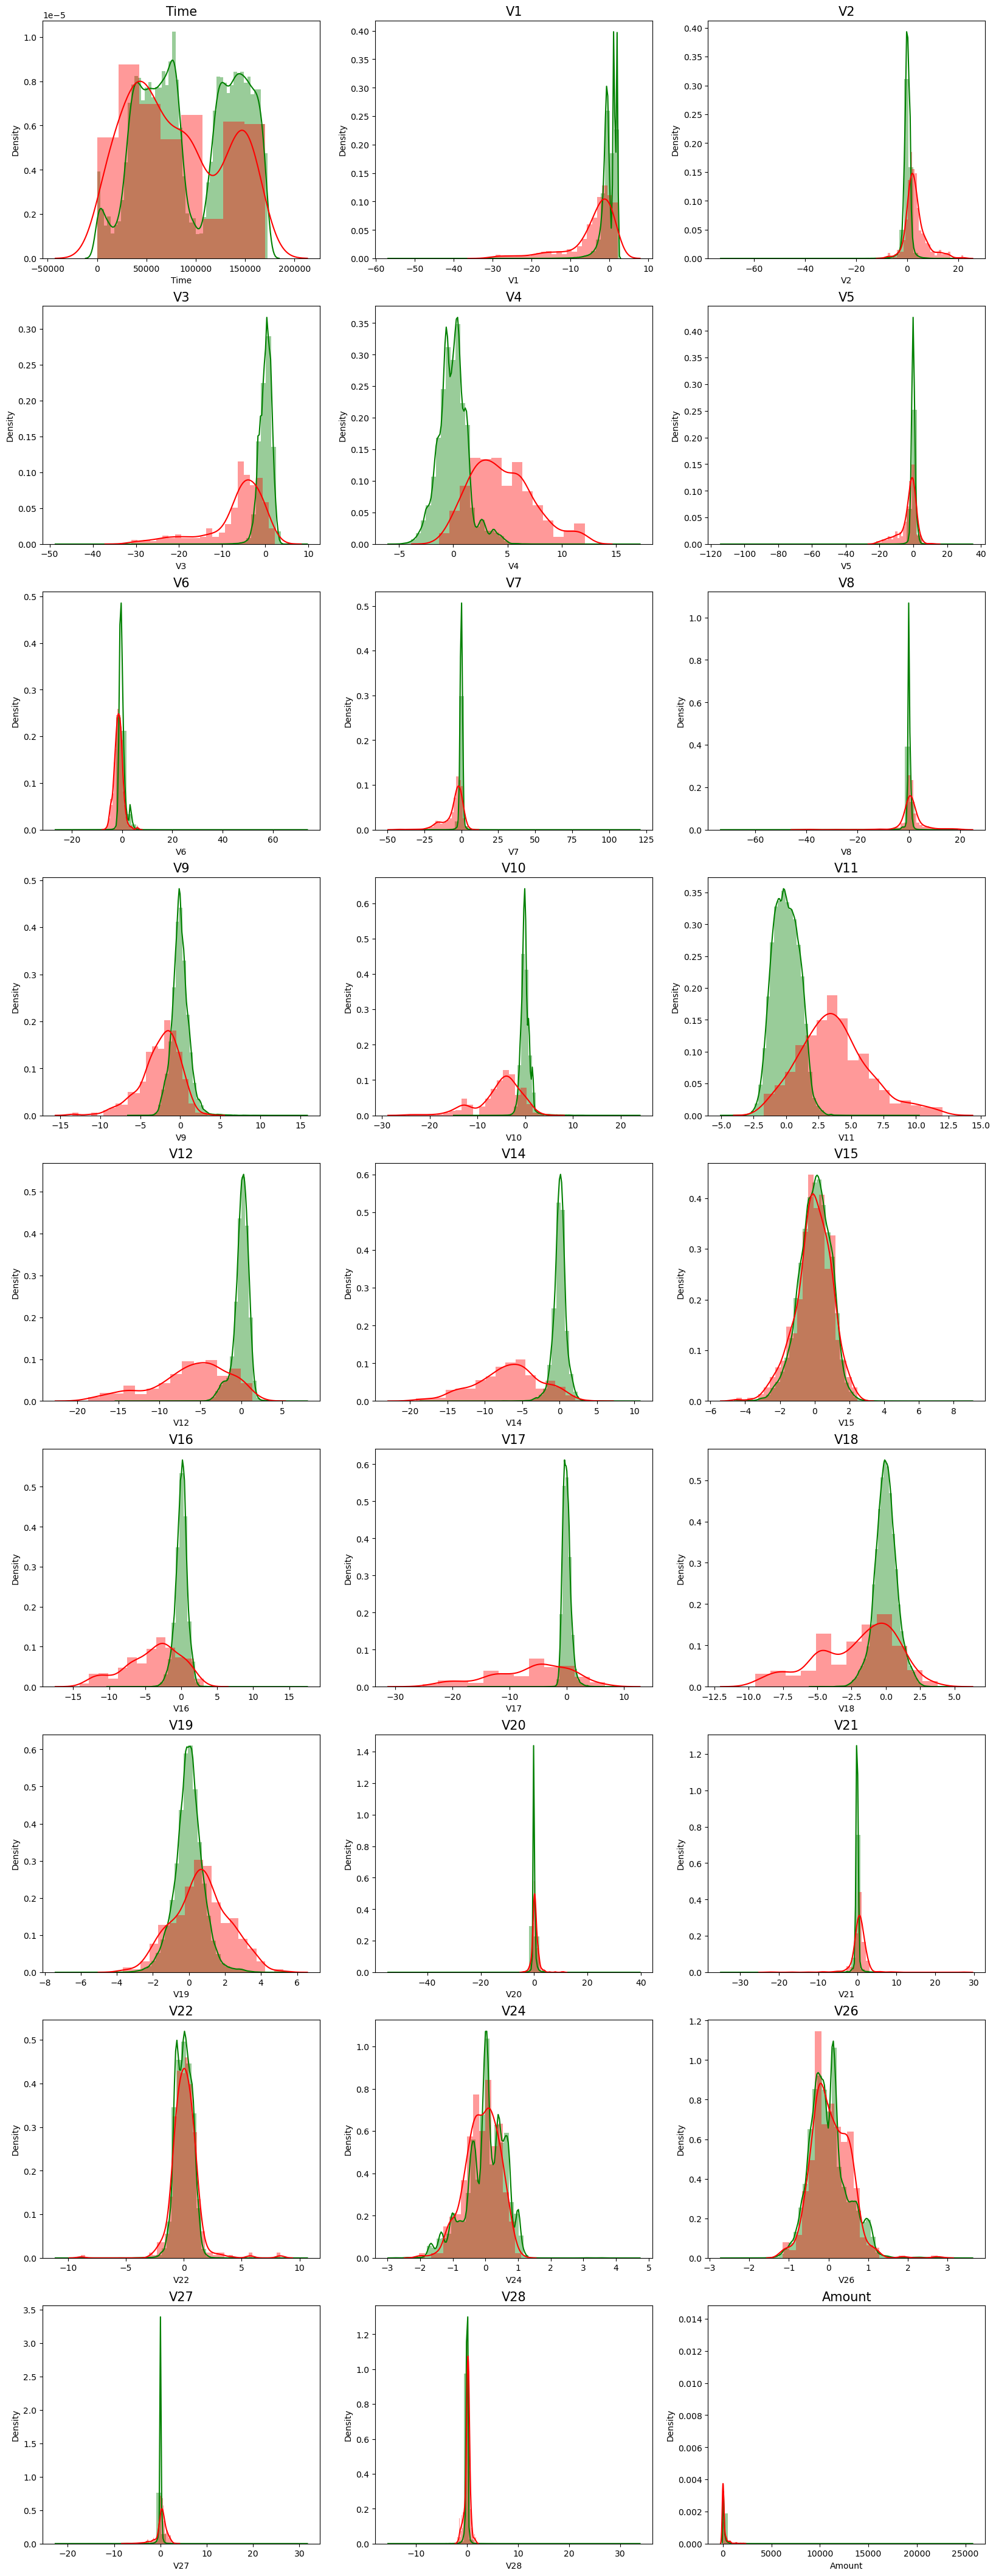

In [33]:
# Plotting the histogram to see the skewness
genuine_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize= (20,60))
for i, col in enumerate(colms):
  plt.subplot(10,3,i+1)
  sns.distplot(X_dr[col][genuine_records], color='green')
  sns.distplot(X_dr[col][fraud_records], color='red')
  plt.title(col, fontsize=15)
plt.show()

# **MODEL BUILDING**

## **Logistic Regression**

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

X_trainLR, X_testLR, Y_trainLR, Y_testLR = train_test_split(X_dr, Y, test_size=0.2, random_state=1)

skf = StratifiedKFold(n_splits=5)
hyper_params={'LR__penalty':['l1','l2','elasticnet','none'],
              'LR__C':np.linspace(1,10,5),
              'LR__l1_ratio':np.linspace(0.001,0.9999,3),
              'LR__class_weight':[{0:1,1:1},{0:1.5,1:1},{0:2,1:1}]
              }

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
mysteps = [('ss',StandardScaler()),('LR', LogisticRegression(random_state=1, solver = 'saga', max_iter =1000, tol = 0.001))]
m_pipe = Pipeline(steps = mysteps)
rcvLR = RandomizedSearchCV(m_pipe, param_distributions = hyper_params, cv = skf, scoring = 'accuracy')
rcvLR.fit(X_trainLR,Y_trainLR)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('LR',
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=1,
                                                                 solver='saga',
                                                                 tol=0.001))]),
                   param_distributions={'LR__C': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ]),
                                        'LR__class_weight': [{0: 1, 1: 1},
                                                             {0: 1.5, 1: 1},
                                                             {0: 2, 1: 1}],
                                        'LR__l1_ratio': array([0.001  , 0.50045, 0.9999 ]),
                                        'LR__penalty': ['l1', 'l2',
                                                        'elasticnet', 'none']},
                   scoring='accuracy')

In [35]:
rcvLR.best_params_

{'LR__penalty': 'l1',
 'LR__l1_ratio': 0.001,
 'LR__class_weight': {0: 1, 1: 1},
 'LR__C': 7.75}

In [36]:
best_modelLR = rcvLR.best_estimator_
best_modelLR

Pipeline(steps=[('ss', StandardScaler()),
                ('LR',
                 LogisticRegression(C=7.75, class_weight={0: 1, 1: 1},
                                    l1_ratio=0.001, max_iter=1000, penalty='l1',
                                    random_state=1, solver='saga',
                                    tol=0.001))])

In [37]:
rcvLR.best_score_

0.9991408934707904

In [40]:
Y_predsLR = best_modelLR.predict(X_testLR)
Y_predsLR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracyLR = accuracy_score(Y_testLR, Y_predsLR)
print("Accuracy =", accuracyLR)

Accuracy = 0.9992246149508336


In [42]:
from sklearn.metrics import precision_score
precisionLR = precision_score(Y_testLR, Y_predsLR)
print("Precision_Score =",precisionLR)

Precision_Score = 0.8524590163934426


In [43]:
from sklearn.metrics import recall_score
recallLR = recall_score(Y_testLR, Y_predsLR)
print("Recall_Score =",recallLR)

Recall_Score = 0.5977011494252874


In [44]:
from sklearn.metrics import f1_score
f1_scoreLR = f1_score(Y_testLR, Y_predsLR)
print("F1_Score =",f1_scoreLR)

F1_Score = 0.7027027027027027


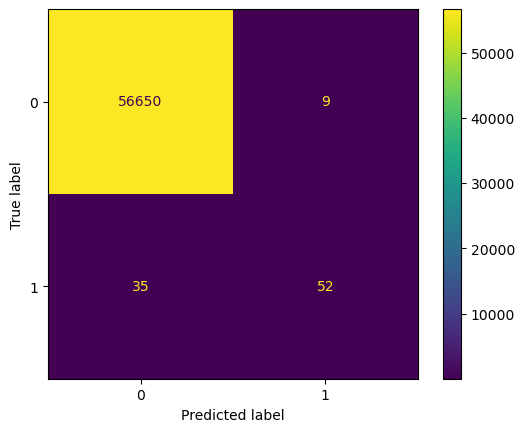

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmLR = confusion_matrix(Y_testLR, Y_predsLR)
DisplayLR = ConfusionMatrixDisplay(confusion_matrix =cmLR, display_labels=rcvLR.classes_)
DisplayLR.plot()
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score
roc_aucLR = roc_auc_score(Y_testLR, best_modelLR.predict_proba(X_testLR)[:, 1])
print("roc_auc_score=", roc_aucLR)

roc_auc_score= 0.9684316316223717


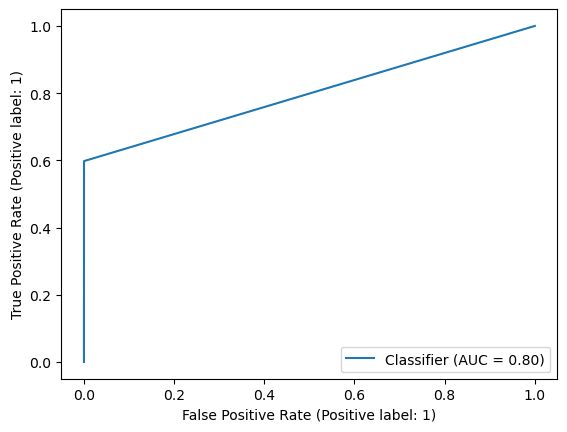

In [47]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_testLR, Y_predsLR)
plt.show()

## **Support Vector Machines (SVC)**

In [48]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

X_trainSVC, X_testSVC, Y_trainSVC, Y_testSVC = train_test_split(X_dr, Y, test_size=0.2, random_state=1)

skf = StratifiedKFold(n_splits= 5)

hyper_params = {"svc__penalty":['l1','l2'],
                "svc__loss":['hinge', 'squared_hinge'],
                "svc__C":np.linspace(1,100,5),
                "svc__class_weight":[{0:1,1:1},{0:1.5,1:1},{0:2,1:1}]}

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mysteps = [('ss', StandardScaler()), ('svc', LinearSVC(random_state=1, max_iter=1000, tol=0.001))]
m_pipe = Pipeline(steps=mysteps)


rcvSVC = RandomizedSearchCV(m_pipe, param_distributions = hyper_params, cv = skf, scoring = "accuracy")
rcvSVC.fit(X_trainSVC,Y_trainSVC)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('svc',
                                              LinearSVC(random_state=1,
                                                        tol=0.001))]),
                   param_distributions={'svc__C': array([  1.  ,  25.75,  50.5 ,  75.25, 100.  ]),
                                        'svc__class_weight': [{0: 1, 1: 1},
                                                              {0: 1.5, 1: 1},
                                                              {0: 2, 1: 1}],
                                        'svc__loss': ['hinge', 'squared_hinge'],
                                        'svc__penalty': ['l1', 'l2']},
                   scoring='accuracy')

In [49]:
rcvSVC.best_params_

{'svc__penalty': 'l2',
 'svc__loss': 'squared_hinge',
 'svc__class_weight': {0: 2, 1: 1},
 'svc__C': 25.75}

In [50]:
best_modelSVC = rcvSVC.best_estimator_
best_modelSVC

Pipeline(steps=[('ss', StandardScaler()),
                ('svc',
                 LinearSVC(C=25.75, class_weight={0: 2, 1: 1}, random_state=1,
                           tol=0.001))])

In [51]:
rcvSVC.best_score_

0.9992025729139131

In [52]:
Y_predsSVC = best_modelSVC.predict(X_testSVC)

In [53]:
from sklearn.metrics import accuracy_score
accuracySVC = accuracy_score(Y_testSVC, Y_predsSVC)
print("Accuracy =", accuracySVC)

Accuracy = 0.9989602791386177


In [54]:
from sklearn.metrics import precision_score
precisionSVC = precision_score(Y_testSVC, Y_predsSVC)
print("Precision_Score =",precisionSVC)

Precision_Score = 0.85


In [55]:
from sklearn.metrics import recall_score
recallSVC = recall_score(Y_testSVC, Y_predsSVC)
print("Recall_Score =",recallSVC)

Recall_Score = 0.39080459770114945


In [56]:
from sklearn.metrics import f1_score
f1_scoreSVC = f1_score(Y_testSVC, Y_predsSVC)
print("F1_Score =",f1_scoreSVC)

F1_Score = 0.5354330708661418


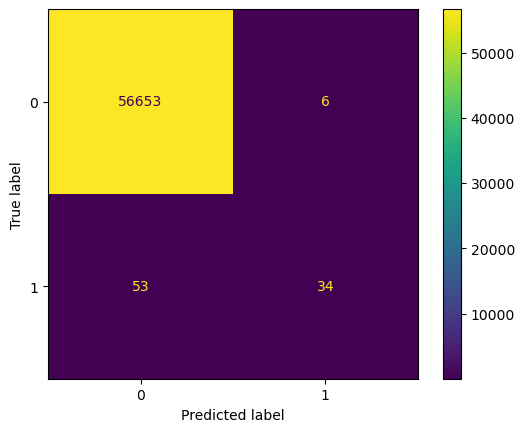

In [57]:
from sklearn.metrics import confusion_matrix
cmSVC = confusion_matrix(Y_testSVC, Y_predsSVC)
DisplaySVC = ConfusionMatrixDisplay(confusion_matrix =cmSVC, display_labels=rcvSVC.classes_)
DisplaySVC.plot()
plt.show()

In [61]:
from sklearn.calibration import CalibratedClassifierCV

# Access the best model from the pipeline
best_model = rcvSVC.best_estimator_.steps[-1][1]  # Extract the LinearSVC model

# Calibrate probabilities for more reliable AUC scores (optional)
calibrated_model = CalibratedClassifierCV(best_model, cv=5)
calibrated_model.fit(X_trainSVC, Y_trainSVC)

# Calculate ROC AUC using the calibrated model (or best_model directly if not calibrating)
roc_auc = roc_auc_score(Y_testSVC, calibrated_model.predict_proba(X_testSVC)[:, 1])
print("roc_auc_score=", roc_auc)


roc_auc_score= 0.8723983549092746


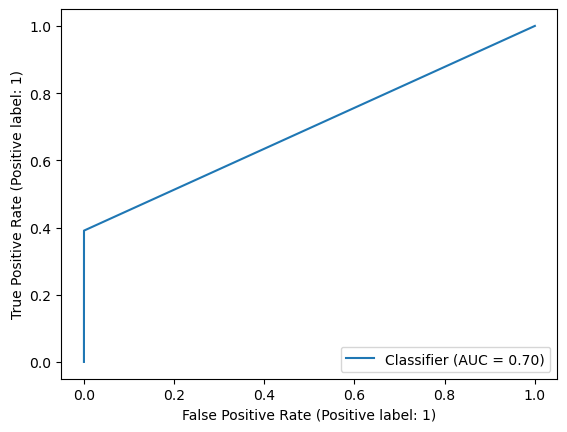

In [62]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_testSVC, Y_predsSVC)
plt.show()

## **Decision Tree Classifier**

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

X_trainDT, X_testDT, Y_trainDT, Y_testDT = train_test_split(X_dr, Y, test_size =0.2, random_state = 1)
skf = StratifiedKFold(n_splits = 5)

# Pre-Pruning 
hyper_params = {'dt__criterion': ['gini', 'entropy', 'log_loss'],
                'dt__splitter': ['best','random'],
                'dt__max_depth': range(3,6),
                'dt__max_features': np.linspace(0.5,1.3)}
mystepsDT = [("dt", DecisionTreeClassifier(random_state = 1))]
m_pipeDT = Pipeline(steps = mystepsDT)

rcvDT = RandomizedSearchCV(m_pipeDT, param_distributions= hyper_params, cv=skf, scoring = 'accuracy')
rcvDT.fit(X_trainDT, Y_trainDT)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('dt',
                                              DecisionTreeClassifier(random_state=1))]),
                   param_distributions={'dt__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'dt__max_depth': range(3, 6),
                                        'dt__max_features': array([0.5       , 0.51632653, 0.53265306, 0.54897959, 0.56530612,
       0.58163265, 0.59795918, 0.61...
       0.82653061, 0.84285714, 0.85918367, 0.8755102 , 0.89183673,
       0.90816327, 0.9244898 , 0.94081633, 0.95714286, 0.97346939,
       0.98979592, 1.00612245, 1.02244898, 1.03877551, 1.05510204,
       1.07142857, 1.0877551 , 1.10408163, 1.12040816, 1.13673469,
       1.15306122, 1.16938776, 1.18571429, 1.20204082, 1.21836735,
       1.23469388, 1.25102041, 1.26734694, 1.28367347, 1.3       ]),
                                        'dt__splitter': ['best', 'random']},
                   scoring='accuracy')

In [64]:
rcvDT.best_params_

{'dt__splitter': 'best',
 'dt__max_features': 0.7612244897959184,
 'dt__max_depth': 5,
 'dt__criterion': 'gini'}

In [66]:
best_modelDT = rcvDT.best_estimator_
best_modelDT

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(max_depth=5,
                                        max_features=0.7612244897959184,
                                        random_state=1))])

In [67]:
Y_predsDT = best_modelDT.predict(X_testDT)
Y_predsDT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
rcvDT.best_score_

0.9994360736628778

In [69]:
accuracyDT = accuracy_score(Y_testDT, Y_predsDT)
print('Accuracy:', accuracyDT)

Accuracy: 0.9994713283755683


In [70]:
precisionDT = precision_score(Y_testDT, Y_predsDT)
print('Precision_Score:', precisionDT)

Precision_Score: 0.8701298701298701


In [71]:
recallDT = recall_score(Y_testDT, Y_predsDT)
print('Recall_Score:', recallDT)

Recall_Score: 0.7701149425287356


In [72]:
f1_scoreDT = f1_score(Y_testDT, Y_predsDT)
print('F1_Score:',f1_scoreDT)

F1_Score: 0.8170731707317073


In [73]:
roc_aucDT = roc_auc_score(Y_testDT, Y_predsDT)
roc_aucDT = roc_auc_score(Y_testDT, best_modelDT.predict_proba(X_testDT)[:, 1])
print("roc_auc_score=", roc_aucDT)

roc_auc_score= 0.9021440628985707


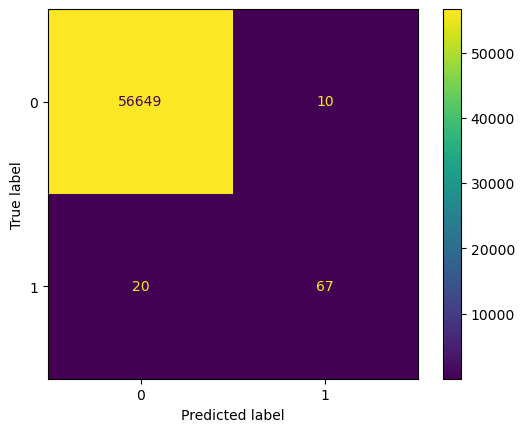

In [76]:
cmDT = confusion_matrix(Y_testDT, Y_predsDT)
DisplayDT = ConfusionMatrixDisplay(confusion_matrix=cmDT, display_labels= rcvDT.classes_)
DisplayDT.plot()
plt.show()

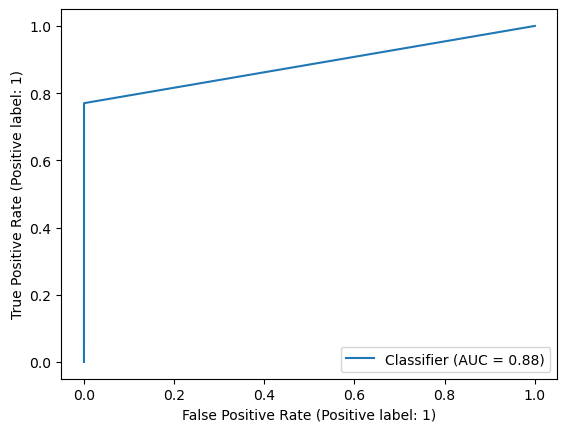

In [77]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_testDT, Y_predsDT)
plt.show()

## Result

In [79]:
model_names = ["Logistic Regression", "SVM", "Decision Tree"]
accuracy_scores = [accuracyLR, accuracySVC, accuracyDT]
precision_scores = [precisionLR, precisionSVC, precisionDT]
recall_scores = [recallLR, recallSVC, recallDT]
f1_scores = [f1_scoreLR, f1_scoreSVC, f1_scoreDT]

# Create a DataFrame
metrics_df = pd.DataFrame(index=model_names, columns=["Accuracy", "Precision", "Recall", "F1 Score"])

# Fill the DataFrame with metrics
metrics_df["Accuracy"] = accuracy_scores
metrics_df["Precision"] = precision_scores
metrics_df["Recall"] = recall_scores
metrics_df["F1 Score"] = f1_scores

# Display the DataFrame
df.metrics_df


AttributeError: 'DataFrame' object has no attribute 'metrics_df'

In [81]:
import pandas as pd  # Import pandas for DataFrame creation

model_names = ["Logistic Regression", "SVM", "Decision Tree"]
accuracy_scores = [accuracyLR, accuracySVC, accuracyDT]
precision_scores = [precisionLR, precisionSVC, precisionDT]
recall_scores = [recallLR, recallSVC, recallDT]
f1_scores = [f1_scoreLR, f1_scoreSVC, f1_scoreDT]

# Create the DataFrame directly with data
metrics_df = pd.DataFrame({
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores
}, index=model_names)

# Display the DataFrame
metrics_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.999225,0.852459,0.597701,0.702703
SVM,0.998960,0.850000,0.390805,0.535433
Decision Tree,0.999471,0.870130,0.770115,0.817073
